# Example 2.3

From Parameter Estimation and Inverse Problems, 3rd edition, 2018    
by R. Aster, B. Borchers, C. Thurber

## Implemented in Python by:
* Nima Nooshiri [@nimanzik](https://github.com/nimanzik)

---

In [1]:
%reset -f

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as nla
from scipy import stats

In [3]:
plt.style.use('ggplot')
plt.style.use('./data/peiplib.mplstyle')

## Data Set

Consider the analysis of a linear regression problem in which the measurement errors are
assumed to be independent and normally distributed, with equal but unknown standard
deviations $\sigma$.    
We are given data $y_i$ collected at points $x_i$ that appear to follow a linear relationship:

In [4]:
# Generate x and y values
x = np.arange(25, 100, 3)
y_true = 10 * x
n_obs = x.size

# Normally distributed random numbers with zero mean and std=5% of y values
rng = np.random.default_rng(seed=0)
e = 0.05 * rng.standard_normal(n_obs) * y_true

# Compute the noisy y values
y = y_true + e

## Least-Squares Regression Solutions

In this case, the system matrix for the forward problem is

$$
G =
\begin{bmatrix}
  1 & x_1 \\
  1 & x_2 \\
  \vdots & \vdots \\
  1 & x_m
\end{bmatrix}
$$

In [5]:
G = np.array([np.ones_like(x), x]).T
G

array([[ 1, 25],
       [ 1, 28],
       [ 1, 31],
       [ 1, 34],
       [ 1, 37],
       [ 1, 40],
       [ 1, 43],
       [ 1, 46],
       [ 1, 49],
       [ 1, 52],
       [ 1, 55],
       [ 1, 58],
       [ 1, 61],
       [ 1, 64],
       [ 1, 67],
       [ 1, 70],
       [ 1, 73],
       [ 1, 76],
       [ 1, 79],
       [ 1, 82],
       [ 1, 85],
       [ 1, 88],
       [ 1, 91],
       [ 1, 94],
       [ 1, 97]])

Now, let's do the regression. The least-squares solution has:

In [6]:
m_est = nla.inv(G.T @ G) @ G.T @ y

print('The least-squares solutions for model parameters:')
m_est

The least-squares solutions for model parameters:


array([-14.62882189,  10.21297011])

Figure below shows the data and the linear regression line:

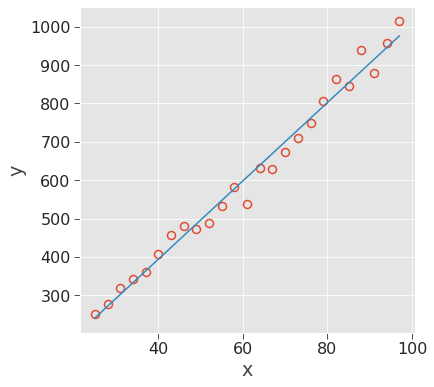

In [7]:
y_reg = G @ m_est

fig, ax = plt.subplots()
ax.plot(x, y, 'o', markerfacecolor='none')
ax.plot(x, y_reg)
ax.set(xlabel='x', ylabel='y');

## Confidence Intervals for the Fitted Parameters

Our estimate of the standard deviation of the measurement errors is $s = 30.74$.    
The estimated covariance matrix for the fitted parameters is:

In [8]:
residuals = y_reg - y

# No. of degrees of freedom
dof = n_obs - 2

# Estimated standard deviation from residuals
sdev = nla.norm(residuals, 2) / np.sqrt(dof)

# Estimated covariance matrix
covmat = sdev**2 * nla.inv(G.T @ G)

print('Estimated covariance matrix for the fitted parameters:')
covmat

Estimated covariance matrix for the fitted parameters:


array([[ 3.02878097e+02, -4.41049509e+00],
       [-4.41049509e+00,  7.23031982e-02]])

The parameter confidence intervals, evaluated for each parameter separately, are:

In [9]:
ci_half = stats.t.ppf(0.975, dof) * np.sqrt(np.diag(covmat))

print(
    f'95% parameter confidence intervals:',
    f'm1 = {m_est[0]:6.2f} +- {ci_half[0]:6.2f}',
    f'm2 = {m_est[1]:6.2f} +- {ci_half[1]:6.2f}', sep='\n')

95% parameter confidence intervals:
m1 = -14.63 +-  36.00
m2 =  10.21 +-   0.56


## Examine the Residuals

Since the actual standard deviation of the measurement errors is unknown, we cannot perform a
$\chi^2$ test of goodness-of-fit. However, we can still examine the residuals.    
Figure below shows the residuals. It is clear that although they appear to be random, the
standard deviation seems to increase as $x$ and $y$ increase. This is a common phenomenon
in linear regression, called a **proportional effect**. One possible way that such an effect
might occur is if the measurement errors were proportional to the measurement magnitude.
This could occur, for example, due to characteristics of the instrumentation.

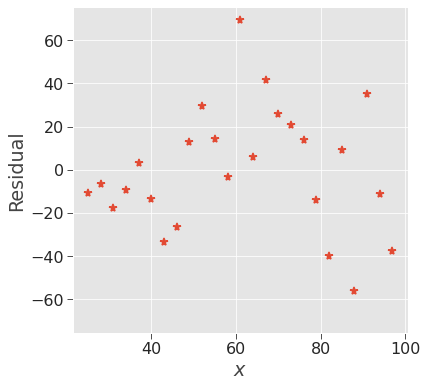

In [10]:
fig, ax = plt.subplots()
ax.plot(x, residuals, '*')
ax.set(xlabel='$x$', ylabel='Residual')

ylim_max = np.max(np.abs(ax.get_ylim()))
ax.set(ylim=[-ylim_max, ylim_max]);

Now, we look at the scaled problem.    
Note that the weithing matrix $\textbf{W}$ has the inverse of the $y$ values on the diagonal.
We obtain a revised least-squares estimate of:

In [11]:
# Rescale the system of equations

W = nla.inv(np.diag(y))
Gw = W @ G
yw = W @ y

m_est_w = nla.inv(Gw.T @ Gw) @ Gw.T @ yw

print('The weighted least-squares solutions for model parameters:')
m_est_w

The weighted least-squares solutions for model parameters:


array([4.5700699 , 9.83836894])

with 95% parameter confidence intervals of:

In [12]:
y_reg_w = Gw @ m_est_w
residuals_w = y_reg_w - yw

# Estimated standard deviation from residuals
dof = n_obs - 2
sdev_w = nla.norm(residuals_w, 2) / np.sqrt(dof)

# Estimated covariance matrix
covmat_w = sdev_w**2 * nla.inv(Gw.T @ Gw)

# 95% confidence interval
ci_half_w = stats.t.ppf(0.975, dof) * np.sqrt(np.diag(covmat_w))

print(
    f'95% parameter confidence intervals:',
    f'm1 = {m_est_w[0]:6.2f} +- {ci_half_w[0]:6.2f}',
    f'm2 = {m_est_w[1]:6.2f} +- {ci_half_w[1]:6.2f}', sep='\n')

95% parameter confidence intervals:
m1 =   4.57 +-  23.28
m2 =   9.84 +-   0.48


Figures below show:
- the data and least squares fit,
- the scaled residuals.

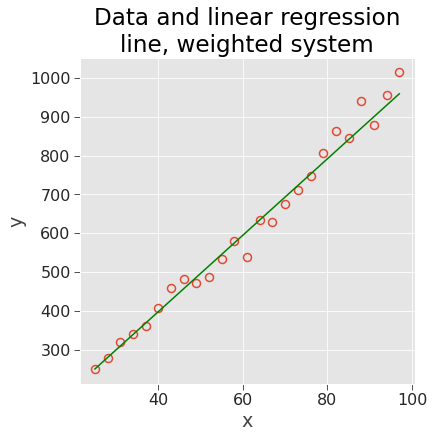

In [13]:
# Compute the modelled y's first
y_reg_w2 = G @ m_est_w

fig, ax = plt.subplots()
ax.plot(x, y, 'o', markerfacecolor='none')
ax.plot(x, y_reg_w2, 'green')
ax.set(
    xlabel='x', ylabel='y',
    title='Data and linear regression\nline, weighted system');

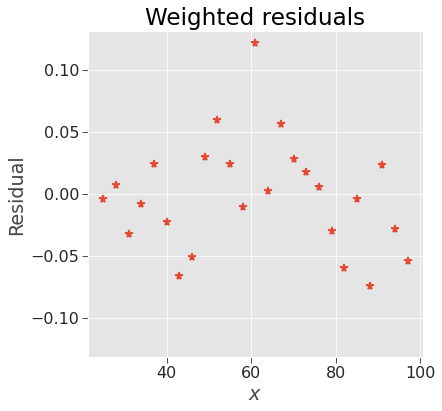

In [14]:
fig, ax = plt.subplots()
ax.plot(x, residuals_w, '*')
ax.set(xlabel='$x$', ylabel='Residual', title='Weighted residuals')

ylim_max = np.max(np.abs(ax.get_ylim()))
ax.set(ylim=[-ylim_max, ylim_max]);